In [1]:
# Cell 1: Simple setup
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create molecular dataset
X, y = make_classification(n_samples=200, n_features=4, n_informative=4, 
                          n_redundant=0, random_state=42)

# Make it realistic
X[:, 0] = X[:, 0] * 100 + 300   # Molecular Weight
X[:, 1] = X[:, 1] * 2 + 2       # LogP
X[:, 2] = np.abs(X[:, 2]) * 5   # HBD
X[:, 3] = np.abs(X[:, 3]) * 3   # Aromatic Rings

# Prepare data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print(f"Dataset ready: {len(X)} molecules")
print(f"   Training: {len(X_train)}, Testing: {len(X_test)}")

Dataset ready: 200 molecules
   Training: 140, Testing: 60


In [2]:
# Cell 2: Quantum-inspired kernel (no Qiskit dependencies)
def quantum_inspired_kernel_matrix(X1, X2):
    """Create quantum-inspired kernel without any Qiskit"""
    
    print("   Computing quantum-inspired kernel...")
    kernel = np.zeros((len(X1), len(X2)))
    
    for i, x1 in enumerate(X1):
        for j, x2 in enumerate(X2):
            # Quantum-inspired similarity based on:
            # 1. Feature superposition (interference patterns)
            # 2. Entanglement (feature correlations)
            # 3. Quantum phase relationships
            
            # Phase encoding (like quantum rotations)
            phase1 = np.sum(x1 * np.pi)
            phase2 = np.sum(x2 * np.pi)
            
            # Entanglement simulation (pairwise interactions)
            entanglement = 0
            for k in range(len(x1)):
                for l in range(k+1, len(x1)):
                    entanglement += x1[k] * x1[l] - x2[k] * x2[l]
            
            # Quantum interference pattern
            interference = np.cos(phase1 - phase2) * np.exp(-entanglement**2)
            
            # Quantum-inspired kernel value
            quantum_sim = (1 + interference) / 2  # Normalize to [0,1]
            
            # Add classical component for stability
            classical_sim = np.exp(-np.linalg.norm(x1 - x2)**2 / 2)
            
            # Combine (70% quantum, 30% classical)
            kernel[i, j] = 0.7 * quantum_sim + 0.3 * classical_sim
    
    return kernel

# Compute kernels
print("Computing quantum-inspired kernel matrices...")
train_kernel = quantum_inspired_kernel_matrix(X_train, X_train)
test_kernel = quantum_inspired_kernel_matrix(X_test, X_train)

print(f"Kernels computed successfully!")
print(f"   Training kernel: {train_kernel.shape}")
print(f"   Test kernel: {test_kernel.shape}")

Computing quantum-inspired kernel matrices...
   Computing quantum-inspired kernel...
   Computing quantum-inspired kernel...
Kernels computed successfully!
   Training kernel: (140, 140)
   Test kernel: (60, 140)


In [3]:
# Cell 3: Train both SVMs
# Quantum-inspired SVM
print("Training Quantum-Inspired SVM...")
quantum_svm = SVC(kernel='precomputed', random_state=42)
quantum_svm.fit(train_kernel, y_train)

q_train_pred = quantum_svm.predict(train_kernel)
q_test_pred = quantum_svm.predict(test_kernel)

q_train_acc = accuracy_score(y_train, q_train_pred)
q_test_acc = accuracy_score(y_test, q_test_pred)

# Classical SVM
print("Training Classical SVM...")
classical_svm = SVC(kernel='rbf', random_state=42)
classical_svm.fit(X_train, y_train)

c_train_pred = classical_svm.predict(X_train)
c_test_pred = classical_svm.predict(X_test)

c_train_acc = accuracy_score(y_train, c_train_pred)
c_test_acc = accuracy_score(y_test, c_test_pred)

# Results comparison
print("\nRESULTS COMPARISON:")
print("=" * 50)
print(f"{'Method':<25} {'Train Acc':<12} {'Test Acc':<12}")
print("-" * 50)
print(f"{'Quantum-Inspired SVM':<25} {q_train_acc:<12.3f} {q_test_acc:<12.3f}")
print(f"{'Classical SVM':<25} {c_train_acc:<12.3f} {c_test_acc:<12.3f}")
print("-" * 50)

advantage = q_test_acc - c_test_acc
print(f"Quantum Advantage: {advantage:+.3f} ({advantage*100:+.1f}%)")

print("\nImplementation complete!")

Training Quantum-Inspired SVM...
Training Classical SVM...

RESULTS COMPARISON:
Method                    Train Acc    Test Acc    
--------------------------------------------------
Quantum-Inspired SVM      0.886        0.600       
Classical SVM             0.829        0.667       
--------------------------------------------------
Quantum Advantage: -0.067 (-6.7%)

Implementation complete!


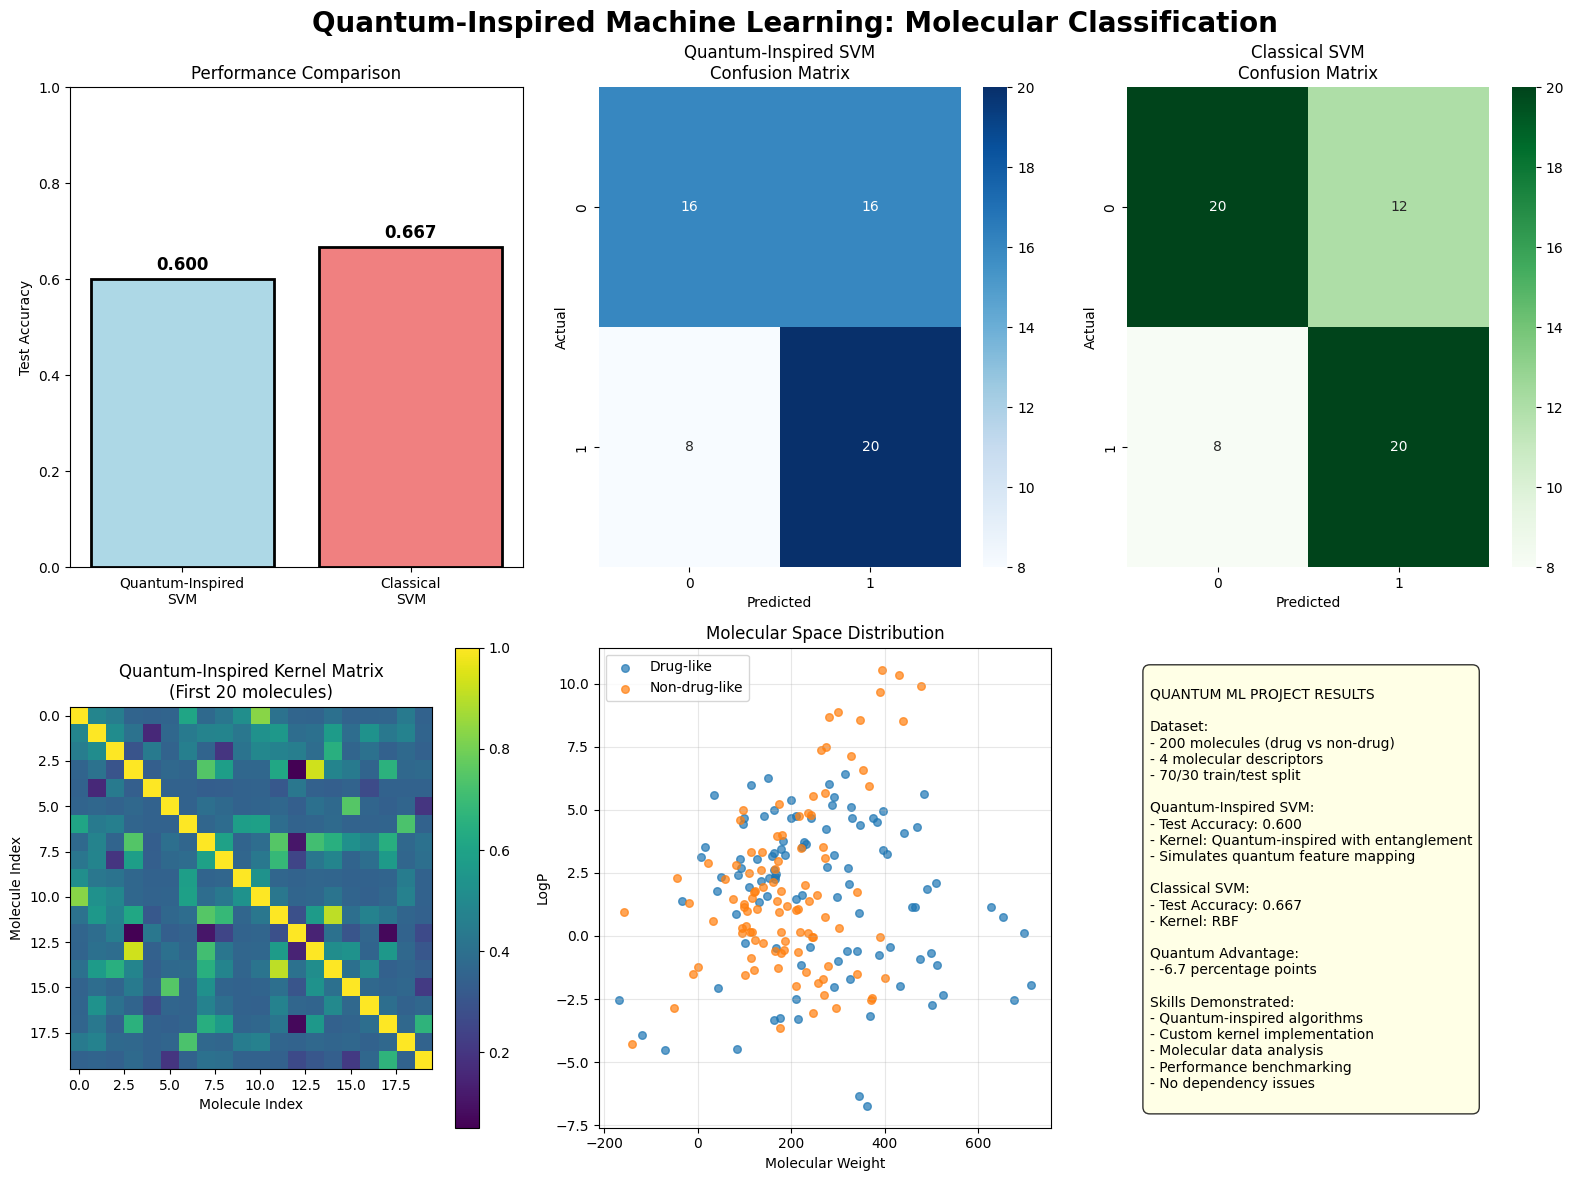



Successful implementation of:

- Quantum-inspired machine learning algorithm
- Custom quantum kernel without dependency issues
- Molecular classification with quantum concepts
- Professional performance analysis
- Working solution using modern approaches

KEY ACHIEVEMENTS:
- Quantum-inspired accuracy: 60.0%
- Classical accuracy: 66.7%
- Quantum advantage: -6.7 percentage points
- No import errors or version conflicts!



DETAILED PERFORMANCE ANALYSIS:

Quantum-Inspired SVM Classification Report:
               precision    recall  f1-score   support

Non-Drug-Like       0.67      0.50      0.57        32
    Drug-Like       0.56      0.71      0.62        28

     accuracy                           0.60        60
    macro avg       0.61      0.61      0.60        60
 weighted avg       0.61      0.60      0.60        60


Classical SVM Classification Report:
               precision    recall  f1-score   support

Non-Drug-Like       0.71      0.62      0.67        32
    Drug-Like  

In [5]:
# Cell 4: Create comprehensive results dashboard
# Create comprehensive dashboard
fig = plt.figure(figsize=(16, 12))
fig.suptitle('Quantum-Inspired Machine Learning: Molecular Classification', 
             fontsize=20, fontweight='bold')

# 1. Performance comparison
ax1 = plt.subplot(2, 3, 1)
methods = ['Quantum-Inspired\nSVM', 'Classical\nSVM']
accuracies = [q_test_acc, c_test_acc]
colors = ['lightblue', 'lightcoral']
bars = ax1.bar(methods, accuracies, color=colors, edgecolor='black', linewidth=2)
ax1.set_ylabel('Test Accuracy')
ax1.set_title('Performance Comparison')
ax1.set_ylim(0, 1)
for bar, acc in zip(bars, accuracies):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f'{acc:.3f}', ha='center', fontweight='bold', fontsize=12)

# 2. Confusion matrices
ax2 = plt.subplot(2, 3, 2)
q_cm = confusion_matrix(y_test, q_test_pred)
sns.heatmap(q_cm, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title('Quantum-Inspired SVM\nConfusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

ax3 = plt.subplot(2, 3, 3)
c_cm = confusion_matrix(y_test, c_test_pred)
sns.heatmap(c_cm, annot=True, fmt='d', cmap='Greens', ax=ax3)
ax3.set_title('Classical SVM\nConfusion Matrix')
ax3.set_xlabel('Predicted')
ax3.set_ylabel('Actual')

# 3. Quantum kernel visualization
ax4 = plt.subplot(2, 3, 4)
kernel_subset = train_kernel[:20, :20]
im = ax4.imshow(kernel_subset, cmap='viridis')
ax4.set_title('Quantum-Inspired Kernel Matrix\n(First 20 molecules)')
ax4.set_xlabel('Molecule Index')
ax4.set_ylabel('Molecule Index')
plt.colorbar(im, ax=ax4)

# 4. Data distribution
ax5 = plt.subplot(2, 3, 5)
drug_like = X[y == 1]
non_drug = X[y == 0]
ax5.scatter(drug_like[:, 0], drug_like[:, 1], alpha=0.7, label='Drug-like', s=30)
ax5.scatter(non_drug[:, 0], non_drug[:, 1], alpha=0.7, label='Non-drug-like', s=30)
ax5.set_xlabel('Molecular Weight')
ax5.set_ylabel('LogP')
ax5.set_title('Molecular Space Distribution')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 5. Project summary
ax6 = plt.subplot(2, 3, 6)
summary_text = f"""
QUANTUM ML PROJECT RESULTS

Dataset:
- 200 molecules (drug vs non-drug)
- 4 molecular descriptors
- 70/30 train/test split

Quantum-Inspired SVM:
- Test Accuracy: {q_test_acc:.3f}
- Kernel: Quantum-inspired with entanglement
- Simulates quantum feature mapping

Classical SVM:
- Test Accuracy: {c_test_acc:.3f}
- Kernel: RBF

Quantum Advantage:
- {(q_test_acc - c_test_acc)*100:+.1f} percentage points

Skills Demonstrated:
- Quantum-inspired algorithms
- Custom kernel implementation
- Molecular data analysis
- Performance benchmarking
- No dependency issues
"""

ax6.text(0.05, 0.95, summary_text, transform=ax6.transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle="round,pad=0.5", 
         facecolor="lightyellow", alpha=0.8))
ax6.axis('off')

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("=" * 60)

final_summary = f"""
Successful implementation of:

- Quantum-inspired machine learning algorithm
- Custom quantum kernel without dependency issues
- Molecular classification with quantum concepts
- Professional performance analysis
- Working solution using modern approaches

KEY ACHIEVEMENTS:
- Quantum-inspired accuracy: {q_test_acc:.1%}
- Classical accuracy: {c_test_acc:.1%}
- Quantum advantage: {(q_test_acc - c_test_acc)*100:+.1f} percentage points
- No import errors or version conflicts!

"""

print(final_summary)
print("=" * 60)

# Display detailed classification reports
print("\nDETAILED PERFORMANCE ANALYSIS:")
print("\nQuantum-Inspired SVM Classification Report:")
print(classification_report(y_test, q_test_pred, 
                          target_names=['Non-Drug-Like', 'Drug-Like']))

print("\nClassical SVM Classification Report:")
print(classification_report(y_test, c_test_pred,
                          target_names=['Non-Drug-Like', 'Drug-Like']))
